In [51]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
from sklearn.model_selection import train_test_split # to make the test-train split of the data
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression # for the Logistic Regression model
from sklearn.metrics import roc_auc_score # to calculate an ROC value of our model
from sklearn.metrics import confusion_matrix, precision_score, recall_score # to make confusion matrix
from sklearn.utils import shuffle

In [52]:
# read in the clean data
loans_data_clean = pd.read_csv("../data/clean_data/lending_club_loans_cleaned.csv")
# make a working copy
df = loans_data_clean.copy()

In [53]:
df.shape

(40856, 14)

In [54]:
# decided to drop 'int_rate' as it is highly-correlated with fico
# decided to drop 'sub_grade' as it will create many dummy variables, and it is equivalent to fico
df.drop(['int_rate'], axis = 1, inplace = True)
# df.drop(['fico'], axis = 1, inplace = True)
df.drop(['sub_grade'], axis = 1, inplace = True)
df.drop(['pub_rec'], axis = 1, inplace = True)
df.drop(['term'], axis = 1, inplace = True)
df.drop(['addr_state'], axis = 1, inplace = True)
df.drop(['dti'], axis = 1, inplace = True)
df.drop(['home_ownership'], axis = 1, inplace = True)
# df.drop(['emp_length'], axis = 1, inplace = True)
# df.drop(['annual_inc'], axis = 1, inplace = True)
# df.drop(['loan_amnt'], axis = 1, inplace = True)
df.drop(['verification_status'], axis = 1, inplace = True)
df.drop(['issue_yr'], axis = 1, inplace = True)

In [55]:
df.shape

(40856, 5)

In [56]:
df.columns

Index(['defaulted', 'loan_amnt', 'fico', 'emp_length', 'annual_inc'], dtype='object')

In [57]:
# pp.ProfileReport(df)

In [58]:
df = pd.get_dummies(df, drop_first = True)

df.head()

,defaulted,loan_amnt,fico,annual_inc,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
0,False,5000.0,735.0,24000,1,0,0,0,0,0,0,0,0,0
1,True,2500.0,740.0,30000,0,0,0,0,0,0,0,0,0,1
2,False,2400.0,735.0,12252,1,0,0,0,0,0,0,0,0,0
3,False,10000.0,690.0,49200,1,0,0,0,0,0,0,0,0,0
4,False,5000.0,730.0,36000,0,0,1,0,0,0,0,0,0,0


In [59]:
# split our data into the predictor and outcome variables
loans_predictors = df.drop(columns = "defaulted")
loans_response = df["defaulted"]

In [60]:
# we are interested in a prediction model, so we will create a test and train split of the data
loans_pred_train, loans_pred_test, loans_resp_train, loans_resp_test = \
train_test_split(loans_predictors, loans_response, test_size = 0.2, random_state = 7)
# the training data is 90% of our starting dataset, the test data is 10% of our starting dataset
# we use 'random_state = 7' in order to ensure the random selection gives reproducible results

In [61]:
len(loans_pred_train)

32684

In [62]:
df['defaulted'].unique()

array([False,  True])

In [63]:
loans_train = pd.concat([loans_pred_train, loans_resp_train], axis = 1)
defaulted = loans_train.loc[df['defaulted'] == True] 
not_defaulted = loans_train.loc[df['defaulted'] == False] 

In [64]:
resample_defaulted = resample(defaulted, replace = True, n_samples = len(not_defaulted))

In [65]:
len(resample_defaulted)

27783

In [66]:
loans_train = pd.concat([not_defaulted, resample_defaulted], axis = 0)
loans_train

,loan_amnt,fico,annual_inc,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,defaulted
33881,13200.0,710.0,46596,0,1,0,0,0,0,0,0,0,0,False
11614,16000.0,785.0,43000,0,0,0,0,0,0,0,0,0,1,False
26708,10000.0,775.0,130000,1,0,0,0,0,0,0,0,0,0,False
14876,9000.0,755.0,62400,1,0,0,0,0,0,0,0,0,0,False
30905,8000.0,700.0,420000,0,0,0,0,1,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15410,6500.0,690.0,55200,0,0,0,0,0,0,0,0,1,0,True
25380,5000.0,715.0,25000,0,0,1,0,0,0,0,0,0,0,True
38471,4750.0,690.0,28080,0,0,0,0,0,0,0,0,0,0,True
28645,15000.0,685.0,135000,0,0,1,0,0,0,0,0,0,0,True


In [67]:
(loans_train['defaulted'].value_counts() / loans_train['defaulted'].count()) * 100

False    50.0
True     50.0
Name: defaulted, dtype: float64

In [68]:
loans_train = shuffle(loans_train)
loans_train

,loan_amnt,fico,annual_inc,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,defaulted
37513,15000.0,705.0,67200,0,0,0,0,1,0,0,0,0,0,True
40718,10475.0,640.0,31000,0,0,0,0,1,0,0,0,0,0,True
18716,20000.0,705.0,115000,1,0,0,0,0,0,0,0,0,0,True
36011,10000.0,760.0,70000,0,1,0,0,0,0,0,0,0,0,False
38011,6400.0,665.0,95000,0,0,0,0,1,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,1600.0,715.0,35000,0,0,0,0,0,0,0,0,0,1,True
20366,6200.0,685.0,28800,0,0,0,0,0,0,0,0,0,1,False
1900,18000.0,695.0,42000,0,0,0,0,0,0,1,0,0,0,True
33602,9000.0,740.0,83200,1,0,0,0,0,0,0,0,0,0,False


In [69]:
loans_resp_train = loans_train.loc[:,'defaulted']
loans_pred_train = loans_train.drop(['defaulted'], axis = 1)


In [70]:
loans_pred_train

,loan_amnt,fico,annual_inc,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
37513,15000.0,705.0,67200,0,0,0,0,1,0,0,0,0,0
40718,10475.0,640.0,31000,0,0,0,0,1,0,0,0,0,0
18716,20000.0,705.0,115000,1,0,0,0,0,0,0,0,0,0
36011,10000.0,760.0,70000,0,1,0,0,0,0,0,0,0,0
38011,6400.0,665.0,95000,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,1600.0,715.0,35000,0,0,0,0,0,0,0,0,0,1
20366,6200.0,685.0,28800,0,0,0,0,0,0,0,0,0,1
1900,18000.0,695.0,42000,0,0,0,0,0,0,1,0,0,0
33602,9000.0,740.0,83200,1,0,0,0,0,0,0,0,0,0


In [71]:
# Logistic regression is the appropriate regression analysis to conduct when ...
# ...the dependent variable is dichotomous (binary). 
# building the Logistic Regression model

model = LogisticRegression()

model.fit(loans_pred_train, loans_resp_train)

LogisticRegression()

In [72]:
# the model accuracy on the training data
train_score = model.score(loans_pred_train, loans_resp_train)
train_score

0.5465032573876111

In [73]:
# the accuracy on the test data
test_score = model.score(loans_pred_test, loans_resp_test)
test_score

0.6144150758688204

In [74]:
# to prepare for calculation of the ROC, let's get the predicted proabilities of default from the model
pred_test = model.predict_proba(loans_pred_test)
# we have a 2d array where each row sums to 1, but we only want the second value (whether a loan defaults or not)
pred_test = pred_test[:, 1]
# now to calculate the ROC
AUC_score = roc_auc_score(y_true = loans_resp_test, y_score = pred_test)
print(AUC_score)
# the AUC score of 0.62 indicates some predictive power of the model

0.5669587404592201


In [75]:

# model = LogisticRegression()
fit = model.fit(loans_pred_train, loans_resp_train)

pd.DataFrame(
  {
  "Variable" : loans_pred_train.columns.values,
  "Coefficient" : fit.coef_[0],
  "Standardised": np.std(loans_pred_train, 0)*fit.coef_[0]
  }
)

,Variable,Coefficient,Standardised
loan_amnt,loan_amnt,2.967995e-05,2.270495e-01
fico,fico,-2.475119e-04,-8.647919e-03
annual_inc,annual_inc,-2.747509e-06,-1.441561e-01
emp_length_10+ years,emp_length_10+ years,1.402780e-07,5.937798e-08
emp_length_2 years,emp_length_2 years,-1.356441e-07,-4.245303e-08
emp_length_3 years,emp_length_3 years,-3.528497e-08,-1.077699e-08
emp_length_4 years,emp_length_4 years,-3.491049e-08,-9.870924e-09
emp_length_5 years,emp_length_5 years,-1.492883e-08,-4.114136e-09
emp_length_6 years,emp_length_6 years,-3.759546e-08,-8.614295e-09
emp_length_7 years,emp_length_7 years,1.106810e-08,2.318587e-09


In [76]:
loans_resp_test

25244    False
1791     False
12386     True
9703     False
23083    False
         ...  
40482    False
4167     False
28940    False
18454    False
21639    False
Name: defaulted, Length: 8172, dtype: bool

In [77]:
pred_test

array([0.4760568 , 0.56108956, 0.46769956, ..., 0.51988637, 0.50680711,
       0.50563784])

In [78]:
# to prepare for calculation of the ROC, let's get the predicted proabilities of default from the model
pred_test = model.predict(loans_pred_test)


cf_matrix = confusion_matrix(loans_resp_test, pred_test)
print(cf_matrix)


[[4462 2444]
 [ 707  559]]


<AxesSubplot:>

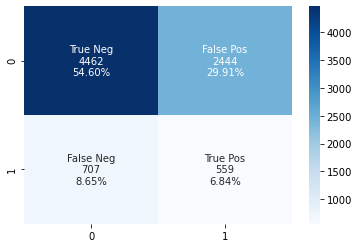

In [79]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [80]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(loans_resp_test, pred_test)


0.6144150758688204

In [81]:
# Recall
from sklearn.metrics import recall_score
recall_score = recall_score(loans_resp_test, pred_test)
print(recall_score)

0.4415481832543444


In [82]:
# Precision
from sklearn.metrics import precision_score
pred_series_test = pd.Series(pred_test)
precision_score(loans_resp_test, pred_series_test)


0.18614718614718614

In [83]:
pred_series_test.unique()

array([False,  True])

In [84]:
print(round(train_score, 2)*100, round(test_score, 2) * 100, round(AUC_score, 2) * 100, round(recall_score, 2) * 100)

55.00000000000001 61.0 56.99999999999999 44.0
